# Machine Learning Algorithms - (0) Gradient Descent

<div style="border: 1px solid #007acc; background-color: #e6f4ff; padding: 10px; border-radius: 5px; color: black;">
  <strong>📘 Info:</strong> I do not claim ownership of the content in this notebook. It is based on different tutorials and resources. Parts of the code or text may have been copy-pasted or adapted directly from those or other sources for learning purposes.
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
np.random.seed(42)

## 1. Mathematical Intuition

Given a loss function $J(\theta)$ depending on parameters $\theta$, the goal is to find parameters that minimize this function.

### 1.1. Gradient Descent (GD)

Gradient Descent is an iterative optimization algorithm used to find the minimum of a function. In the context of machine learning, this function is usually a loss function that measures how well the model is performing.

At each step, we compute the gradient (partial derivatives) of the loss function with respect to the parameters and update the parameters in the opposite direction of the gradient. This is because the gradient points in the direction of steepest ascent, so we move in the opposite direction to minimize the function.

The update rule is:
$$
\theta := \theta - \eta \cdot \nabla_\theta J(\theta)
$$
Where:
- $\theta$ are the parameters of the model.
- $\eta$ is the learning rate, a small positive value that controls the size of the update step.
- $\nabla_\theta J(\theta)$ is the gradient of the loss function with respect to $\theta$.

This update is repeated until convergence (i.e., until the change in $\theta$ becomes very small or the loss no longer decreases significantly).

### 1.2. Stochastic Gradient Descent (SGD)

In practice, computing the gradient using the entire dataset can be computationally expensive, especially for large datasets. Stochastic Gradient Descent addresses this by approximating the gradient using a single randomly chosen data point at each iteration.

Instead of computing:
$$
\nabla_\theta J(\theta) = \frac{1}{n} \sum_{i=1}^n \nabla_\theta J(\theta^{(i)})
$$
SGD updates the parameters using:
$$
\theta := \theta - \eta \cdot \nabla_\theta J(\theta^{(i)})
$$
Where $\theta^{(i)}$ refers to the $i$-th training example. This introduces noise in the updates but can lead to faster convergence in practice, especially when the dataset is large. The noise can also help escape local minima.


## 2. Data and Loss Function

We use the Mean Squared Error (MSE) for a simple linear regression model with bias:

$$
\hat{y}_i = \theta_0 + \theta_1 x_i \quad \text{and} \quad J(\theta) = \frac{1}{n} \sum_{i=1}^{n} (\theta_0 + \theta_1 x_i - y_i)^2
$$

The gradients are:
$$
\frac{\partial J}{\partial \theta_0} = \frac{2}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i), \quad \frac{\partial J}{\partial \theta_1} = \frac{2}{n} \sum_{i=1}^{n} x_i (\hat{y}_i - y_i)
$$

In [4]:
# Simulated data: y = 2x + 5 + noise
x = np.linspace(0, 10, 100)
y = 2 * x + 5 + np.random.normal(0, 2, size=x.shape)

# Loss function (for plotting only)
def loss(theta0, theta1, x, y):
    y_pred = theta0 + theta1 * x
    return np.mean((y_pred - y) ** 2)

# Full-batch gradient for MSE loss
def mse_gradient(theta0, theta1, x, y):
    y_pred = theta0 + theta1 * x
    error = y_pred - y
    d_theta0 = 2 * np.mean(error)
    d_theta1 = 2 * np.mean(x * error)
    return d_theta0, d_theta1

# Point-wise gradient (for SGD)
def mse_gradient_single(theta0, theta1, x_i, y_i):
    error = (theta0 + theta1 * x_i) - y_i
    d_theta0 = 2 * error
    d_theta1 = 2 * x_i * error
    return d_theta0, d_theta1

## 3. Implementing Gradient Descent

In [5]:
def gradient_descent(x, y, grad_func, init_theta0, init_theta1, learning_rate, n_epochs):
    theta0 = init_theta0
    theta1 = init_theta1
    history = [(theta0, theta1)]
    for epoch in range(n_epochs):
        d_theta0, d_theta1 = grad_func(theta0, theta1, x, y)
        theta0 -= learning_rate * d_theta0
        theta1 -= learning_rate * d_theta1
        history.append((theta0, theta1))
    return history

history_gd = gradient_descent(x, y, mse_gradient, init_theta0=0.0, init_theta1=0.0, learning_rate=0.01, n_epochs=100)

## 4. Implementing Stochastic Gradient Descent (SGD)

In [6]:
def stochastic_gradient_descent(x, y, grad_func, init_theta0, init_theta1, learning_rate, n_epochs):
    theta0 = init_theta0
    theta1 = init_theta1
    history = [(theta0, theta1)]
    for epoch in range(n_epochs):
        indices = np.random.permutation(len(x))
        for i in indices:
            d_theta0, d_theta1 = grad_func(theta0, theta1, x[i], y[i])
            theta0 -= learning_rate * d_theta0
            theta1 -= learning_rate * d_theta1
        history.append((theta0, theta1))
    return history

history_sgd = stochastic_gradient_descent(x, y, mse_gradient_single, init_theta0=0.0, init_theta1=0.0, learning_rate=0.01, n_epochs=100)

## 5. Visualization of Convergence

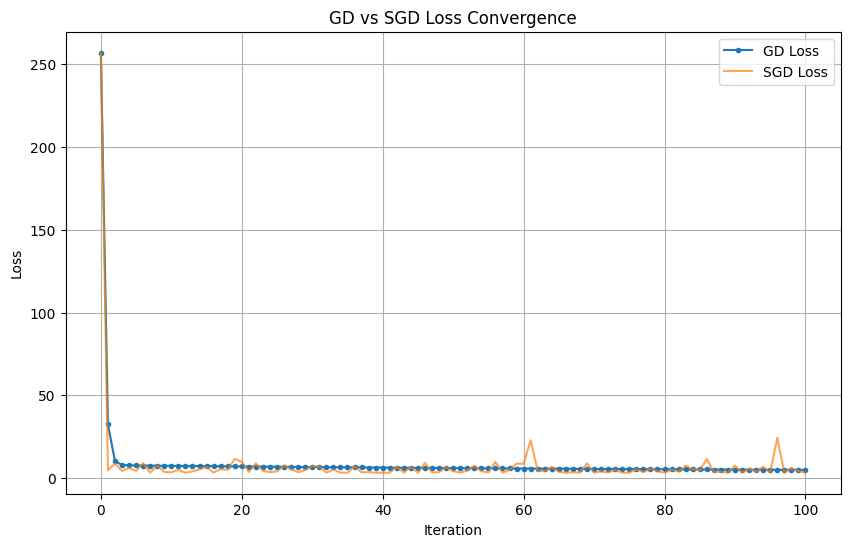

In [7]:
loss_vals_gd = [loss(t0, t1, x, y) for t0, t1 in history_gd]
loss_vals_sgd = [loss(t0, t1, x, y) for t0, t1 in history_sgd]

plt.figure(figsize=(10, 6))
plt.plot(loss_vals_gd, label='GD Loss', marker='o', markersize=3)
plt.plot(loss_vals_sgd, label='SGD Loss', alpha=0.7)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('GD vs SGD Loss Convergence')
plt.legend()
plt.grid(True)
plt.show()